Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

### **1. Data Collection**

In [3]:
#loading the CSV file into and Pandas DataFrame
IOT_Device_Network_Log = pd.read_csv('IOT Device Network Log.csv')

In [4]:
#first 5 rows
IOT_Device_Network_Log.head()

,frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,normality
0,1,123722736684743,54,87971959760497,167275820076079,192168035,1921680121,6.0,40.0,0.0,49279.0,80.0,-99.0,0
1,2,123722736773147,62,87971959760497,167275820076079,192168035,1921680121,6.0,48.0,0.0,56521.0,80.0,-99.0,0
2,3,123722736824792,62,167275820076079,87971959760497,1921680121,192168035,6.0,48.0,0.0,80.0,56521.0,-99.0,0
3,4,123722736836228,54,167275820076079,87971959760497,1921680121,192168035,6.0,40.0,0.0,80.0,49279.0,-99.0,0
4,5,123722749684991,54,87971959760497,167275820076079,192168035,1921680121,6.0,40.0,0.0,56521.0,80.0,-99.0,0


In [5]:
#last 5 rows
IOT_Device_Network_Log.tail()

,frame.number,frame.time,frame.len,eth.src,eth.dst,ip.src,ip.dst,ip.proto,ip.len,tcp.len,tcp.srcport,tcp.dstport,Value,normality
477421,87181,128413885087438,42,167275820076079,87971959760497,0,0,-1.0,0.0,0.0,0.0,0.0,-5.0,5
477422,69378,127166820599383,42,167275820076079,87971959760497,0,0,-1.0,0.0,0.0,0.0,0.0,-5.0,5
477423,81928,126800153119873,42,167275820076079,87971959760497,0,0,-1.0,0.0,0.0,0.0,0.0,-5.0,5
477424,37052,124902446969093,42,167275820076079,87971959760497,0,0,-1.0,0.0,0.0,0.0,0.0,-5.0,5
477425,78990,128113220512685,42,167275820076079,87971959760497,0,0,-1.0,0.0,0.0,0.0,0.0,-5.0,5


In [6]:
IOT_Device_Network_Log.columns

Index(['frame.number', 'frame.time', 'frame.len', 'eth.src', 'eth.dst',
       'ip.src', 'ip.dst', 'ip.proto', 'ip.len', 'tcp.len', 'tcp.srcport',
       'tcp.dstport', 'Value', 'normality'],
      dtype='object')

[Link to the Dataset](https://www.kaggle.com/datasets/speedwall10/iot-device-network-logs?select=Preprocessed_data.csv)

**About Dataset**

Preprocessed dataset for network based intrusion detection system in Iot Devices. Ultrasonic Sensor with Arduino and NodeMCU used to monitor the network and collect the network logs. NodeMCU with ESP8266 wifi module was used to send data to the server via wifi.

**Explanation of each feature in the IoT Device Network Log dataset:**

1. **frame.number**: Sequential identifier for each frame (or packet) captured in the network log.
2. **frame.time**: Timestamp of when each frame was captured, providing precise timing information.
3. **frame.len**: Length of each frame in bytes, indicating the size of each packet.
4. **eth.src**: Source Ethernet (MAC) address from where the packet originated.
5. **eth.dst**: Destination Ethernet (MAC) address to which the packet is being sent.
6. **ip.src**: Source IP address from where the packet originated.
7. **ip.dst**: Destination IP address to which the packet is being sent.
8. **ip.proto**: IP protocol used in the packet, indicating the higher-level protocol (e.g., TCP, UDP, ICMP).
9. **ip.len**: Length of the IP packet, including the IP header and data.
10. **tcp.len**: Length of the TCP segment, including the TCP header and data.
11. **tcp.srcport**: Source port number in the TCP segment, identifying the sending port at the source device.
12. **tcp.dstport**: Destination port number in the TCP segment, identifying the receiving port at the destination device.
13. **Value**: Specific measured value or a custom field related to the data being analyzed (e.g., sensor values or specific metrics). This could be specific to the setup involving the ultrasonic sensor and network conditions.
14. **normality**: Target column indicating the type of network traffic with the following values:

* 0 - Normal:

 * This represents typical, expected network traffic with no malicious activity. The data packets are transmitted and received as intended without any interference or abnormal patterns.
* 1 - Wrong setup:

 * This indicates an incorrect network configuration or setup, which could lead to communication issues. Examples include incorrect IP addresses, misconfigured routers, or faulty device settings that disrupt normal network operations.
* 2 - DDoS (Distributed Denial of Service):

 * This type of traffic involves a coordinated attack from multiple sources aimed at overwhelming a network or server, rendering it unavailable to legitimate users. The attackers flood the target with a high volume of traffic to exhaust resources and disrupt normal service.
* 3 - Data type probing:

 * This involves sending data packets with unusual or unexpected data types to the server, often to test for vulnerabilities. For instance, sending string values to a server expecting different data types (e.g., numeric or binary data) can help identify weaknesses in the server's handling of data.
* 4 - Scan attack:

 * This type of attack involves systematically probing a network to identify open ports, active IP addresses, and services running on the network. The goal is to gather information that can be used for further attacks, such as exploiting vulnerabilities in discovered services.
* 5 - Man in the middle:

 * This attack occurs when an attacker intercepts and possibly alters the communication between two parties without their knowledge. The attacker can eavesdrop on the conversation, steal sensitive data, or inject malicious content into the communication stream.

### **2. Data Analysis**

In [7]:
#number of rows and columns
IOT_Device_Network_Log.shape

(477426, 14)

In [8]:
#checking for missing values
IOT_Device_Network_Log.isnull().sum()

frame.number    0
frame.time      0
frame.len       0
eth.src         0
eth.dst         0
ip.src          0
ip.dst          0
ip.proto        0
ip.len          0
tcp.len         0
tcp.srcport     0
tcp.dstport     0
Value           0
normality       0
dtype: int64

In [9]:
# Display a summary of the DataFrame, including the number of non-null entries and data types of each column
IOT_Device_Network_Log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477426 entries, 0 to 477425
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   frame.number  477426 non-null  int64  
 1   frame.time    477426 non-null  int64  
 2   frame.len     477426 non-null  int64  
 3   eth.src       477426 non-null  int64  
 4   eth.dst       477426 non-null  int64  
 5   ip.src        477426 non-null  int64  
 6   ip.dst        477426 non-null  int64  
 7   ip.proto      477426 non-null  float64
 8   ip.len        477426 non-null  float64
 9   tcp.len       477426 non-null  float64
 10  tcp.srcport   477426 non-null  float64
 11  tcp.dstport   477426 non-null  float64
 12  Value         477426 non-null  float64
 13  normality     477426 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 51.0 MB


In [10]:
## Count the occurrences of each unique value in the 'normality' column and display the results
IOT_Device_Network_Log.normality.value_counts()

normality
1    82285
4    79052
0    79035
5    79032
2    79020
3    79002
Name: count, dtype: int64

The dataset is complete with no missing values and is balanced. This completeness helps in building robust models without the need for imputation or handling missing data and without the need for handling imbalanced dataset.

### **3. Data Splitting**

The best features for training a network intrusion detection model involves understanding which aspects of the network traffic are most indicative of different types of intrusions. Based on the dataset, the following features are valuable:

**Frame-level Features:**

* frame.len: Packet size can be indicative of certain types of attacks, such as DDoS (large number of packets of similar size) or data exfiltration (larger packets).

**Ethernet-level Features:**

* eth.src and eth.dst: Source and destination MAC addresses can help identify unusual patterns of communication, such as repeated attempts to connect to different devices (scanning) or unexpected devices communicating with each other (man-in-the-middle).

**IP-level Features:**

* ip.src and ip.dst: Source and destination IP addresses are crucial for identifying unusual or unauthorized communication patterns. Anomalies in IP addresses can indicate various attacks.
ip.proto: Different protocols (e.g., TCP, UDP, ICMP) can indicate different types of traffic. Certain attacks may use specific protocols.

**TCP-level Features:**

* tcp.srcport and tcp.dstport: Source and destination port numbers can help identify unusual port usage, which is often a sign of scanning or port-based attacks.
* tcp.len: Similar to frame length, TCP segment length can provide insights into the nature of the traffic.

**Temporal Features:**

* frame.time: Time of packet capture can help in identifying patterns over time, such as bursts of activity that might indicate a DDoS attack or periodic probing attempts.

In [11]:
features = IOT_Device_Network_Log.drop(columns=['frame.number','Value','normality'], axis=1)
target = IOT_Device_Network_Log['normality']

### **4. Model Selection**

Model Selection using Cross-Validation:

In [12]:
models = [RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier(),KNeighborsClassifier()]

In [13]:
# Iterate over the list of models
for model in models:
    # Perform cross-validation with 5 folds and compute the accuracy scores
    cv_score = cross_val_score(model, features, target, cv=5)

    # Calculate the mean accuracy score from the cross-validation results
    mean_accuracy = cv_score.mean()


    print('Model used:', model)
    print('Cross Validation accuracies =', cv_score)
    print('Accuracy score =', round(mean_accuracy * 100, 2), '%')
    print('---------------------------------------------------------------')

Model used: RandomForestClassifier()
Cross Validation accuracies = [0.99858618 0.99496256 0.99323454 0.96756559 0.98412316]
Accuracy score = 98.77 %
---------------------------------------------------------------
Model used: GradientBoostingClassifier()
Cross Validation accuracies = [0.99808349 0.99766455 0.9987642  0.996722   0.99886893]
Accuracy score = 99.8 %
---------------------------------------------------------------
Model used: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
       

* Best Performing Model: GradientBoostingClassifier (highest accuracy and consistent performance).
* Other Strong Models: RandomForestClassifier and XGBClassifier.
* KNeighborsClassifier shows the lowest performance.

### **5. Model Training :**

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.2,stratify=target,random_state=2)

In [15]:
classifier = GradientBoostingClassifier()

In [16]:
classifier.fit(X_train,Y_train)

GradientBoostingClassifier()

### **6. Model Evaluation**

Evaluation on training data

In [17]:
y_true = Y_train
y_pred = classifier.predict(X_train)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred)


In [18]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.998622820338273
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63228
           1       0.99      1.00      1.00     65828
           2       1.00      1.00      1.00     63216
           3       1.00      1.00      1.00     63202
           4       1.00      1.00      1.00     63241
           5       1.00      1.00      1.00     63225

    accuracy                           1.00    381940
   macro avg       1.00      1.00      1.00    381940
weighted avg       1.00      1.00      1.00    381940



Text(0.5, 23.52222222222222, 'predicted label')

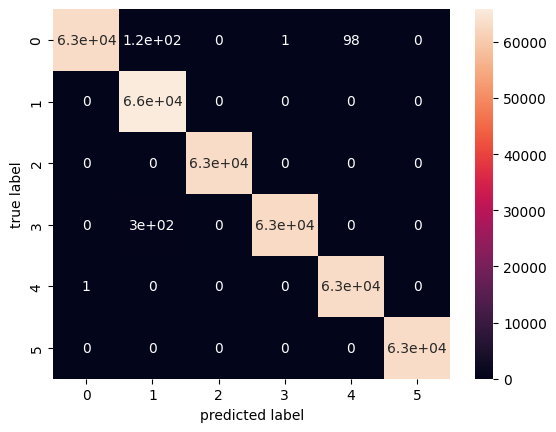

In [19]:
plt.figure()
sns.heatmap(cm, annot=True)
plt.ylabel('true label')
plt.xlabel('predicted label')

Evaluation on training data

In [20]:
y_true = Y_test
y_pred = classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred)


In [21]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9984290890811218
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15807
           1       0.99      1.00      1.00     16457
           2       1.00      1.00      1.00     15804
           3       1.00      1.00      1.00     15800
           4       1.00      1.00      1.00     15811
           5       1.00      1.00      1.00     15807

    accuracy                           1.00     95486
   macro avg       1.00      1.00      1.00     95486
weighted avg       1.00      1.00      1.00     95486



Text(0.5, 23.52222222222222, 'predicted label')

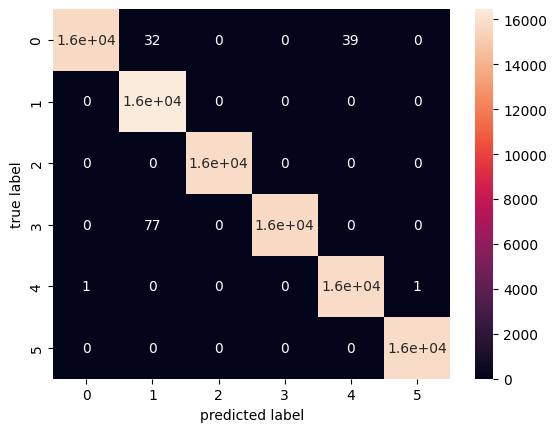

In [22]:
plt.figure()
sns.heatmap(cm, annot=True)
plt.ylabel('true label')
plt.xlabel('predicted label')

In [23]:
def predict_normality(input_data):
    input_data = np.array(input_data).reshape(1,-1)
    df_input_data = pd.DataFrame(input_data,columns=['frame.time', 'frame.len', 'eth.src', 'eth.dst', 'ip.src', 'ip.dst',
       'ip.proto', 'ip.len', 'tcp.len', 'tcp.srcport', 'tcp.dstport'])
    prediction = classifier.predict(df_input_data)
    return prediction[0]

In [24]:
#saving the model
with open('classifier_model.pkl', 'wb') as file:
    joblib.dump(classifier, file)